# Build a ML project for  Intel Image  Classification



## SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mounted at /content/gdrive


In [ ]:
def acc_loss_graph(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## GET AND ORGANIZE DATA

### Download Kaggle dataset straight to Google Drive


Normally, we have to first manually download dataset from Kaggle, then upload it to Colab or Google Drive. It takes a lot of time, especially for big datasets because the uploading speed is usually much slower than downloading. 

In this tutorial, I will show you how to download Kaggle dataset straight to Google Drive!

*Remember that if uploading to Colab, you will lose it whenever Colab is closed.*



**STEP 1: GET API KEY FROM YOUR ACCOUNT**

Visit [www.kaggle.com](http://www.kaggle.com/) ⇨ login ⇨ Account ⇨ Create New API Token

The “kaggle.json” file will be auto downloaded.

**STEP 2: SETUP KAGGLE**

In [ ]:
# Now upload the file "kaggle.json" file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"crystaljr","key":"f1f7f46a821e6ccd5a74a0d7c958b2b5"}'}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=cdbadb99c88ca6c16e07c47c312b97865e2d0020cf75ea9da3102d26a850361d
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


**STEP 3: USAGE**

In [ ]:
# Use with option -p to choose the destination
!kaggle datasets download -d puneet6060/intel-image-classification -p /content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF

 97% 337M/346M [00:02<00:00, 145MB/s]
100% 346M/346M [00:02<00:00, 153MB/s]


In [ ]:
# Now you can Unzip it!
# !unzip -q <SOURCE-PATH> -d <DESTINATION-PATH>

!unzip -q /content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/intel-image-classification.zip -d /content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF

### Organize data to corresponding directories (optional)

The following python code will use the Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [ ]:
import zipfile
import os
import shutil
import glob as gb
import pathlib

#### Split train folder

Next, we need to split our train folder into train folder and validation folder!

Let's define each of these directories:


In [ ]:
#PATH only, not creating yet

base_dir_train = '/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_train/'
base_dir_test = '/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_test/' 
base_dir_pred = '/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_pred/'

# Directory with train, test and predict pictures
train_dir = os.path.join(base_dir_train, 'seg_train')
test_dir = os.path.join(base_dir_test, 'seg_test')
pred_dir = os.path.join(base_dir_pred, 'seg_pred')

#Print number of training and test datas
for folder in  os.listdir(base_dir_train+ 'seg_train') : 
    files = gb.glob(pathname= str(base_dir_train +'seg_train//' + folder + '/*.jpg'))
    print(f'Total train data images for {folder}: {len(files)}')
print('='*50)

for folder in  os.listdir(base_dir_test + 'seg_test') : 
    files = gb.glob(pathname= str(base_dir_test +'seg_test//' + folder + '/*.jpg'))
    print(f'Total test (validation) data images for {folder}: {len(files)}')
print('='*50)

print('Total predict images: ', len(os.listdir(pred_dir)))

Total train data images for street: 2382
Total train data images for glacier: 2404
Total train data images for mountain: 2512
Total train data images for forest: 2271
Total train data images for sea: 2274
Total train data images for buildings: 2191
Total test (validation) data images for street: 501
Total test (validation) data images for glacier: 553
Total test (validation) data images for mountain: 525
Total test (validation) data images for forest: 474
Total test (validation) data images for sea: 510
Total test (validation) data images for buildings: 437
Total predict images:  7301


Let's look at our beautiful paths ;)

In [ ]:
print(train_buildings_dir)
print(test_buildings_dir)

/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_train/seg_train/buildings
/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_test/seg_test/buildings


Let's see what file names look like in train directory of buildings and forest

In [ ]:
train_buildings_fnames = os.listdir( train_buildings_dir )
train_forest_fnames = os.listdir( train_forest_dir )

print(train_buildings_fnames[:10])
print(train_forest_fnames[:10])

['13308.jpg', '17605.jpg', '2691.jpg', '19830.jpg', '1112.jpg', '14799.jpg', '19126.jpg', '6014.jpg', '3207.jpg', '17830.jpg']
['17472.jpg', '1145.jpg', '11590.jpg', '11354.jpg', '2145.jpg', '2849.jpg', '11314.jpg', '923.jpg', '13167.jpg', '13839.jpg']


Let's find out the total number of images in the train, test, predict directories:

### Explore data

Now let's take a look at a few pictures to get a better sense of what the **Intel Image Classification** datasets look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Now, display a batch of 8 buildings and 8 forest pictures. You can rerun the cell to see a fresh batch each time:

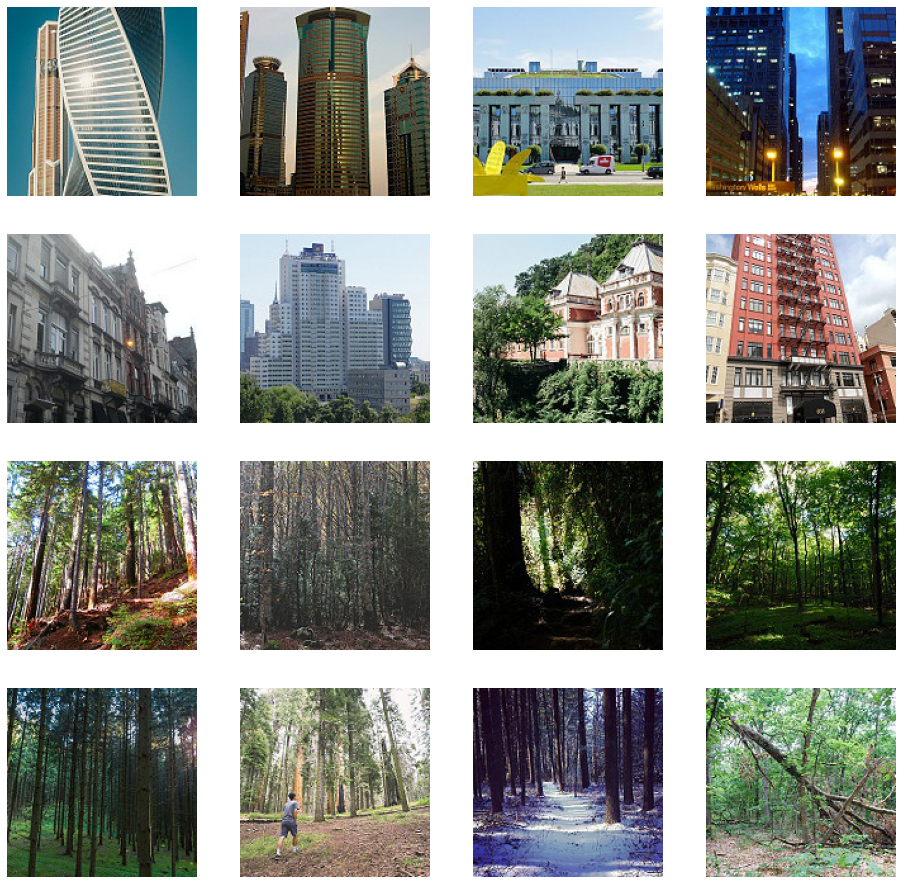

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.figure()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_buildings_pix = [os.path.join(train_buildings_dir, fname) 
                for fname in train_buildings_fnames[ pic_index-8:pic_index] 
               ]

next_forest_pix = [os.path.join(train_forest_dir, fname) 
                for fname in train_forest_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_buildings_pix+next_forest_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


An important note here: **these images come in all shapes and sizes**. **In order to train a neural network inputs have to be in a same size**. We've chosen 150x150 for this, and you'll see that in the next section.

## MAIN PROCESS



### Build model
First, let's defining the model!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def model_maker():
    model = tf.keras.models.Sequential([ # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(6,activation='softmax')                                    
    ])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
model = model_maker()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

### Prepare ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def generator_maker():
  # All images will be rescaled by 1./255.
  train_datagen = ImageDataGenerator(rescale=1./255)
  test_datagen  = ImageDataGenerator(rescale=1./255)


  # --------------------
  # Flow training images in batches of 32 using train_datagen generator
  # --------------------
  train_generator = train_datagen.flow_from_directory(train_dir, # This is the source directory for training images
                                                      batch_size=32,
                                                      class_mode='categorical',  
                                                      target_size=(150, 150))     
  # --------------------
  # Flow test images in batches of 32 using test_datagen generator
  # --------------------
  test_generator =  test_datagen.flow_from_directory(test_dir,
                                                          batch_size=32,
                                                          class_mode  = 'categorical',
                                                          target_size = (150, 150))
  return train_generator, test_generator

Let's check!

In [ ]:
train_generator, test_generator = generator_maker()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### Train

In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=15,
                    verbose=2)

Epoch 1/15
439/439 - 57s - loss: 0.9947 - acc: 0.5974 - val_loss: 0.8432 - val_acc: 0.6820 - 57s/epoch - 131ms/step
Epoch 2/15
439/439 - 25s - loss: 0.6974 - acc: 0.7421 - val_loss: 0.6073 - val_acc: 0.7767 - 25s/epoch - 58ms/step
Epoch 3/15
439/439 - 25s - loss: 0.5552 - acc: 0.7998 - val_loss: 0.5837 - val_acc: 0.7913 - 25s/epoch - 58ms/step
Epoch 4/15
439/439 - 26s - loss: 0.4569 - acc: 0.8325 - val_loss: 0.5428 - val_acc: 0.8207 - 26s/epoch - 58ms/step
Epoch 5/15
439/439 - 25s - loss: 0.3839 - acc: 0.8593 - val_loss: 0.4996 - val_acc: 0.8310 - 25s/epoch - 58ms/step
Epoch 6/15
439/439 - 25s - loss: 0.3134 - acc: 0.8878 - val_loss: 0.5095 - val_acc: 0.8303 - 25s/epoch - 58ms/step
Epoch 7/15
439/439 - 26s - loss: 0.2594 - acc: 0.9047 - val_loss: 0.5854 - val_acc: 0.8290 - 26s/epoch - 59ms/step
Epoch 8/15
439/439 - 25s - loss: 0.2008 - acc: 0.9265 - val_loss: 0.5577 - val_acc: 0.8397 - 25s/epoch - 58ms/step
Epoch 9/15
439/439 - 25s - loss: 0.1513 - acc: 0.9455 - val_loss: 0.6548 - val_

Last check for validation accuracy and loss of final model

In [ ]:
model.evaluate(test_generator)

94/94 [==============================] - 4s 47ms/step - loss: 0.9514 - acc: 0.8277


[0.9513681530952454, 0.8276666402816772]

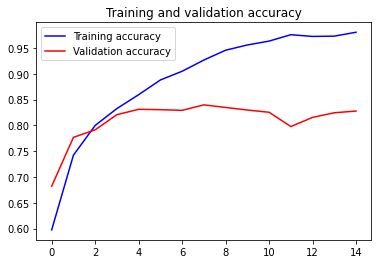

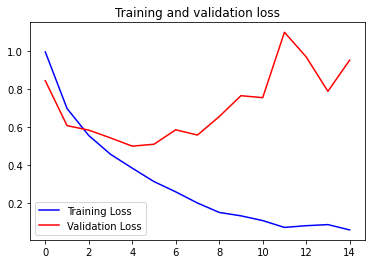

In [ ]:
acc_loss_graph(history)

The Training Accuracy is close to 100%, and the validation accuracy is in the 80% range => overfitting

Let's see if we can do better to avoid overfitting, and one simple method is to augment the images a bit.  

So, let's fine tune!

#### Save and Restore model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

**Method 2: Use Model Checkpoint callback (recommended)**

*Create a tf.keras.callbacks.ModelCheckpoint callback that save model checkpoints during training:*
- ```save_best_only```: Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.
- ```save_weights_only```: Whether only weights are saved, or the whole model is saved.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath="/content/gdrive/MyDrive/DATASET/INTEL_IMG_CLF/result/my_model_checkpoint.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=5,
                    callbacks=[checkpoint_callback],
                    verbose=2)

Epoch 1/5

Epoch 00001: val_loss improved from inf to 1.04297, saving model to /content/gdrive/MyDrive/DATASET/INTEL_IMG_CLF/result/my_model_checkpoint.h5
439/439 - 25s - loss: 0.0686 - acc: 0.9765 - val_loss: 1.0430 - val_acc: 0.8053 - 25s/epoch - 58ms/step
Epoch 2/5

Epoch 00002: val_loss did not improve from 1.04297
439/439 - 25s - loss: 0.0592 - acc: 0.9804 - val_loss: 1.0984 - val_acc: 0.8290 - 25s/epoch - 57ms/step
Epoch 3/5

Epoch 00003: val_loss did not improve from 1.04297
439/439 - 25s - loss: 0.0435 - acc: 0.9860 - val_loss: 1.1200 - val_acc: 0.8153 - 25s/epoch - 57ms/step
Epoch 4/5

Epoch 00004: val_loss did not improve from 1.04297
439/439 - 25s - loss: 0.0419 - acc: 0.9873 - val_loss: 1.2014 - val_acc: 0.8157 - 25s/epoch - 57ms/step
Epoch 5/5

Epoch 00005: val_loss did not improve from 1.04297
439/439 - 25s - loss: 0.0465 - acc: 0.9856 - val_loss: 1.1646 - val_acc: 0.8167 - 25s/epoch - 57ms/step


**Restore: Load both model and weights from h5 file**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/DATASET/INTEL_IMG_CLF/result/my_model_checkpoint.h5')

# Show the model architecture
restored_model.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Re-evaluate the model
loss, acc = restored_model.evaluate(test_generator)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

### Fine tune 

#### Early Stopping

In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10,
    verbose=1)

Now combines that with model checkpoint then you should have a killer way to train your model:
- Only train up to a certain point where model is no longer improved
- Get the best model with lowest validation loss without training the model again

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="my_model_checkpoint.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

#### Image Augmentation

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
Here's some code where we've added Image Augmentation. Run it to see the impact.


In [ ]:
def generator_augmentation_maker():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  test_generator = test_datagen.flow_from_directory(
          test_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, test_generator

In [ ]:
model = model_maker()

train_generator, test_generator = generator_augmentation_maker()

history = model.fit(train_generator,
                    epochs=25,
                    validation_data=test_generator,
                    callbacks=[checkpoint_callback, earlystopping_callback], 
                    verbose=1) # verbose=2 if you want to hide the progress bar

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/25
439/439 [==============================] - ETA: 0s - loss: 1.1696 - acc: 0.5281
Epoch 00001: val_loss improved from inf to 0.92489, saving model to my_model_checkpoint.h5
439/439 [==============================] - 103s 232ms/step - loss: 1.1696 - acc: 0.5281 - val_loss: 0.9249 - val_acc: 0.6450
Epoch 2/25
439/439 [==============================] - ETA: 0s - loss: 0.9740 - acc: 0.6242
Epoch 00002: val_loss did not improve from 0.92489
439/439 [==============================] - 102s 232ms/step - loss: 0.9740 - acc: 0.6242 - val_loss: 0.9725 - val_acc: 0.6333
Epoch 3/25
439/439 [==============================] - ETA: 0s - loss: 0.8741 - acc: 0.6714
Epoch 00003: val_loss improved from 0.92489 to 0.67065, saving model to my_model_checkpoint.h5
439/439 [==============================] - 102s 231ms/step - loss: 0.8741 - acc: 0.6714 - val_loss: 0.6707 - val_acc: 0.7563
Epoch 4/25
439/439 [==========

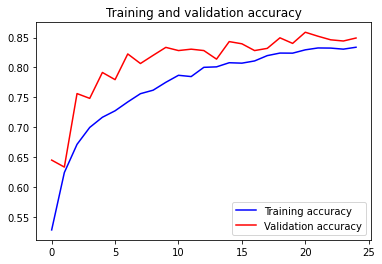

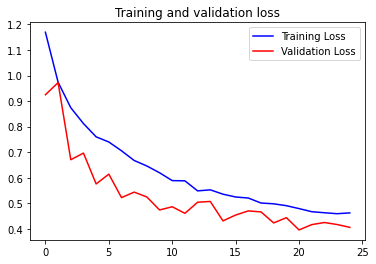

In [ ]:
acc_loss_graph(history)

Amazing! You can see that the image augmentation works so well to avoid overfitting since our model never the same image twice so it got no idea what is coming next to memorize the training set!

#### Dropout Layer

In [ ]:
# Dropout 20%

In [ ]:
from tensorflow.keras import layers

In [ ]:
def model_maker_with_dropout():
  model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dropout(0.2),
      layers.Dense(512, activation='relu'),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer='adam',
              metrics=['accuracy'])
  return model

**Let's combine both Image Augmentation and Dropout!**

In [ ]:
model = model_maker_with_dropout()
train_generator, test_generator = generator_augmentation_maker()

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, # Create ReduceLROnPlateau Callback
                              patience=1, min_lr=0.001)

history = model.fit(train_generator,
                    epochs=60,
                    validation_data=test_generator,
                    callbacks=[checkpoint_callback, earlystopping_callback, reduce_lr],
                    verbose=2)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/60

Epoch 00001: val_loss improved from inf to 1.03365, saving model to my_model_checkpoint.h5
439/439 - 128s - loss: 1.2043 - accuracy: 0.5157 - val_loss: 1.0336 - val_accuracy: 0.6033 - lr: 0.0010 - 128s/epoch - 292ms/step
Epoch 2/60

Epoch 00002: val_loss improved from 1.03365 to 0.78803, saving model to my_model_checkpoint.h5
439/439 - 97s - loss: 0.9964 - accuracy: 0.6114 - val_loss: 0.7880 - val_accuracy: 0.6970 - lr: 0.0010 - 97s/epoch - 221ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 0.78803
439/439 - 98s - loss: 0.8576 - accuracy: 0.6745 - val_loss: 0.7997 - val_accuracy: 0.7100 - lr: 0.0010 - 98s/epoch - 222ms/step
Epoch 4/60

Epoch 00004: val_loss improved from 0.78803 to 0.63807, saving model to my_model_checkpoint.h5
439/439 - 97s - loss: 0.7861 - accuracy: 0.7078 - val_loss: 0.6381 - val_accuracy: 0.7750 - lr: 0.0010 - 97s/epoch - 222ms/step
Epoch 5/60

Epoch 000

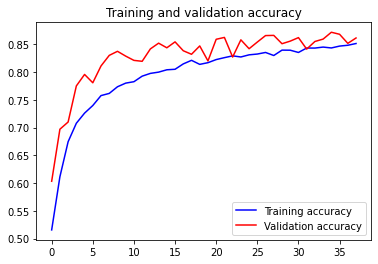

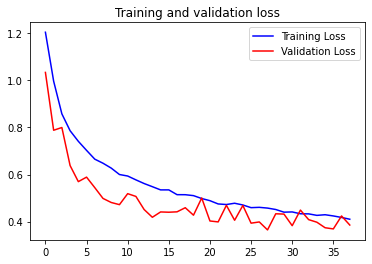

In [ ]:
acc_loss_graph(history)

In [ ]:
model.evaluate(test_generator)

94/94 [==============================] - 5s 49ms/step - loss: 0.3855 - accuracy: 0.8613


[0.3854812681674957, 0.8613333106040955]

You can see that by combining both image augmentation and dropout, the line of validation is following very closely to train set which is good news. However, there are a lot of spiking since our dense neurons need to works harder to detect features with image augmentation so dropout 50% gets in their way. Maybe it is worth to try again this time with lower dropout percentage.

### Predict a real image

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is buildings, forest, mountain or sea,...

In [ ]:
from google.colab import files
# UPLOAD A PHOTO and PREDICT
uploaded = files.upload()
for fn in uploaded.keys():
  print(fn)
  img_path = './' + fn

Saving IMG_3355.jpg to IMG_3355.jpg
IMG_3355.jpg


In [ ]:
# OR CHOOSE A RANDOM PHOTO FROM PREDICTION FOLDER
import random
import pathlib
from pathlib import Path
import glob 

TEST_SET= Path('/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_pred/seg_pred')
img_path = random.choice(list(TEST_SET.glob('*')))
img_path

PosixPath('/content/sample_data/MyDrive/DATASET/INTEL_IMG_CLF/seg_pred/seg_pred/22733.jpg')

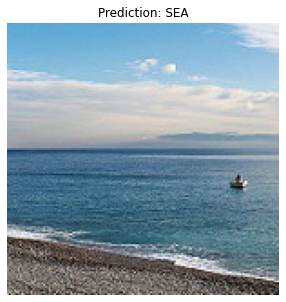

In [ ]:
import numpy as np
img        = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0)

prediction = restored_model.predict(img_array)

for key, value in test_generator.class_indices.items():
  if value == prediction[0].argmax(): # argmax -> index
    pred = key

plt.figure(figsize=(5,5))
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Prediction: ' + pred.upper()) #label predicted
plt.axis('off')
plt.grid(b=None)
plt.show()